In [1]:
# import packages
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# load iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [3]:
from sklearn.preprocessing import StandardScaler
# Standardize features by removing the mean and scaling to unit variance.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=12)

In this example, 80% of the data will be used for training, and 20% will be used for testing.

Supervised learning is a type of machine learning where the algorithm learns from labeled data to make predictions
on new, unseen data. There are several types of supervised learning algorithms in Scikit-Learn:

- **Linear Regression**: A linear model that predicts a continuous output variable.
- **Logistic Regression**: A logistic model that predicts a binary classification output variable.
- **Decision Trees**: An algorithm that uses decision trees to make predictions.

In [5]:
# linear regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error
# Mean squared error regression loss.

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.050137394896614985


In [7]:
from sklearn.svm import SVC
from sklearn import metrics
# It seeks to find the hyperplane that best separates the data points into different classes

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)
print(
    f"Classification report for classifier {svc_model}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30




Confusion matrix:
[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]


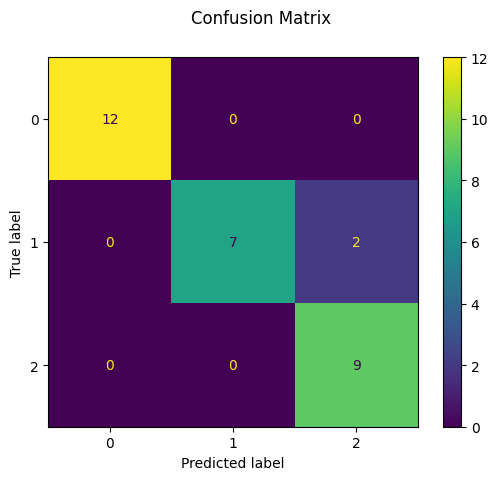

In [8]:
import matplotlib.pyplot as plt

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Now, let us do pipeline, hyperparameter tuning and implement unsupervised learning (k-means) on Iris.
- **pipeline**: Combine preprocessing and modeling into a single workflow
- **hyperparameter tuning**: Hyperparameter tuning is essential to optimize your model's performance.
- **unsupervised learning**:  A type of machine learning that learns from data without human supervision
- **k-means**: An iterative, centroid-based clustering algorithm that partitions a dataset into similar groups based on the distance between their centroids

In [18]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

params = {
    'kmeans__n_clusters': [2, 3, 4],  # Test different cluster counts
    'kmeans__init': ['k-means++', 'random'],  # Initialization methods
    'kmeans__n_init': [10, 20],  # Number of initializations
}

def custom_scorer(estimator, X):
    # Transform data using the pipeline's scaler
    X_scaled = estimator.named_steps['scaler'].transform(X)
    # Predict clusters using the pipeline's K-Means
    labels = estimator.named_steps['kmeans'].predict(X_scaled)
    # Calculate silhouette score
    return silhouette_score(X_scaled, labels)

scorer = make_scorer(custom_scorer, needs_y=False)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=params,
    scoring=scorer,  # Use the custom silhouette scorer
    cv=5,  # 5-fold cross-validation
    verbose=1  # Print progress
)

grid_search.fit(X)

print("Best parameters:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


f:\data-science\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "f:\data-science\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
f:\data-science\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "f:\data-science\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best parameters: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 2, 'kmeans__n_init': 10}
Best silhouette score: nan
